## Cleaning the data

**I. Getting rid of null values**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

my_data = pd.read_csv("train.csv")
my_test_data = pd.read_csv("test.csv")

In [2]:
my_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# identify how many null values we have
nullseries = my_data.isnull().sum()
print(nullseries[nullseries > 0])
# We can drop the Alley feature because it has no values for almost all of the samples
    # For Misc feature, PoolQC, and Fence - can we assume that null values means the given sample doesn't have this feature?
    # same with basement, garage, and fireplace
    # Alternatively, we can just put U on the blank features
    # Check value counts to see if there is a "None" value
# We can drop na for Electrical since it's only 1

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
# According to kaggle, NA = none, so we can replace NA values with 'None'
    # For: Misc, PoolQC, Fence, Basement, Garage, Fireplace, MasVnr | NA = none or 0
# For Electrical: leave it to dropna

cols = ["MiscFeature", "PoolQC", "Fence", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
        "BsmtFinType2", "MasVnrType", "MasVnrArea", "Alley",
        "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
for col in cols:
    my_data[col].fillna("None", inplace=True)
    my_test_data[col].fillna("None", inplace=True)

In [6]:
# See how the null values have improved
nullseries = my_data.isnull().sum()
print(nullseries[nullseries > 0])
# Features with null values left: LotFrontage & Electrical

LotFrontage    259
Electrical       1
dtype: int64


In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
my_data_exp = my_data.copy()

<AxesSubplot:xlabel='BldgType', ylabel='LotFrontage'>

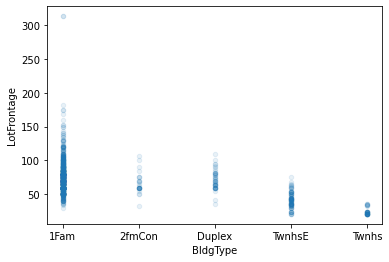

In [9]:
# let's see what is the best predictor for LotFrontage
# corr_matrix = my_data_exp.corr()
# print(corr_matrix["LotFrontage"].sort_values(ascending=False))

# copied from handson ML book
import matplotlib.pyplot as plt
my_data.plot(kind="scatter", x="BldgType", y="LotFrontage", alpha=0.1)

# It turns out that houses with the same BldgType tends to have similar LotFrontage size

In [11]:
from sklearn.model_selection import train_test_split

X = my_data.drop('SalePrice', axis=1)
y = my_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(my_data, y, test_size=0.1)

In [12]:
# Get the error of baseline model

from sklearn.metrics import mean_absolute_error

average_saleprice = my_data["SalePrice"].mean()
baseline_test_predictions = [average_saleprice]*len(X_test)

mean_absolute_error(baseline_test_predictions, y_test)

# 58432.462225558265
# 68705.85115406268
# 61028.98129104897

57415.24008256708

In [13]:
LF_mean_train = X_train["LotFrontage"].copy()
LF_mean_test = X_test["LotFrontage"].copy()

LF_mean_train.fillna(LF_mean_train.mean(), inplace=True) # ref change
LF_mean_test.fillna(LF_mean_test.mean(), inplace=True)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(LF_mean_train.to_numpy().reshape(-1, 1), y_train)
rfc_predictions1 = rfc.predict(LF_mean_test.to_numpy().reshape(-1, 1))

mean_absolute_error(rfc_predictions1, y_test)

# Note: Reshape your data either using array.reshape(-1, 1)
# if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

65051.57534246575

In [14]:
# Get the mean LotFrontage per bldg type
# Use that to populate missing Lot Frontage values based on their building type

def FrontageFromBldgType(data):

    PredLF=[]
    l = 0
    Bldg_list = data["BldgType"].to_numpy()
    # Next step, if LotFrontage is NA, fill it will Pred_LF
    for rows in Bldg_list:
        Bldg_list[l].strip()
        if Bldg_list[l] == '1Fam':
            PredLF.append(np.mean(data.query("BldgType == '1Fam'")["LotFrontage"]))
        elif Bldg_list[l] == 'TwnhsE':
            PredLF.append(np.mean(data.query("BldgType == 'TwnhsE'")["LotFrontage"]))
        elif Bldg_list[l] == 'Duplex':
            PredLF.append(np.mean(data.query("BldgType == 'Duplex'")["LotFrontage"]))
        elif Bldg_list[l] == 'Twnhs':
            PredLF.append(np.mean(data.query("BldgType == 'Twnhs'")["LotFrontage"]))
        elif Bldg_list[l] == '2fmCon':
            PredLF.append(np.mean(data.query("BldgType == '2fmCon'")["LotFrontage"]))
        l += 1
    data.insert(2, "Pred_LF", PredLF)
    data["LotFrontage"].fillna(data["Pred_LF"], inplace=True)
    return data

In [15]:
# 2nd implem of RFC, with LotFrontage NA filled from BldgType

LF_BldgType_train = X_train.copy()
LF_BldgType_test = X_test.copy()

FrontageFromBldgType(LF_BldgType_train) # the error starts here
FrontageFromBldgType(LF_BldgType_test)

# Fill null values of LotFrontage with the row's Pred_LF
#LF_BldgType_train["LotFrontage"].fillna(LF_BldgType_train["Pred_LF"], inplace=True)
#LF_BldgType_test["LotFrontage"].fillna(LF_BldgType_test["Pred_LF"], inplace=True)

,Id,MSSubClass,Pred_LF,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1187,1188,20,74.260417,RL,89.000000,12461,Pave,None,Reg,Lvl,...,0,None,GdPrv,None,0,7,2006,WD,Normal,262000
941,942,60,74.260417,RL,74.260417,8755,Pave,None,IR1,Lvl,...,0,None,GdPrv,None,0,6,2009,WD,Normal,214000
169,170,20,74.260417,RL,74.260417,16669,Pave,None,IR1,Lvl,...,0,None,None,None,0,1,2006,WD,Normal,228000
326,327,120,45.166667,RL,32.000000,10846,Pave,None,IR1,Lvl,...,0,None,None,None,0,5,2008,Con,Normal,324000
619,620,60,74.260417,RL,85.000000,12244,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2008,WD,Normal,305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,20,74.260417,RL,88.000000,11394,Pave,None,Reg,Lvl,...,0,None,None,None,0,6,2010,New,Partial,394432
1349,1350,70,74.260417,RM,50.000000,5250,Pave,Pave,Reg,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,122000
1064,1065,20,74.260417,RL,74.260417,11000,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,11,2009,WD,Normal,154000
238,239,20,74.260417,RL,93.000000,12030,Pave,None,Reg,Lvl,...,0,None,None,None,0,12,2007,New,Partial,318000


In [16]:
LF_BldgType_train = LF_BldgType_train["LotFrontage"]
LF_BldgType_test = LF_BldgType_test["LotFrontage"]

rfc.fit(LF_BldgType_train.to_numpy().reshape(-1, 1), y_train)
rfc_predictions2 = rfc.predict(LF_BldgType_test.to_numpy().reshape(-1, 1))

mean_absolute_error(rfc_predictions2, y_test)

54235.59589041096

In [17]:
FrontageFromBldgType(X_train)
FrontageFromBldgType(X_test)

,Id,MSSubClass,Pred_LF,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1187,1188,20,74.260417,RL,89.000000,12461,Pave,None,Reg,Lvl,...,0,None,GdPrv,None,0,7,2006,WD,Normal,262000
941,942,60,74.260417,RL,74.260417,8755,Pave,None,IR1,Lvl,...,0,None,GdPrv,None,0,6,2009,WD,Normal,214000
169,170,20,74.260417,RL,74.260417,16669,Pave,None,IR1,Lvl,...,0,None,None,None,0,1,2006,WD,Normal,228000
326,327,120,45.166667,RL,32.000000,10846,Pave,None,IR1,Lvl,...,0,None,None,None,0,5,2008,Con,Normal,324000
619,620,60,74.260417,RL,85.000000,12244,Pave,None,Reg,Lvl,...,0,None,None,None,0,8,2008,WD,Normal,305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,20,74.260417,RL,88.000000,11394,Pave,None,Reg,Lvl,...,0,None,None,None,0,6,2010,New,Partial,394432
1349,1350,70,74.260417,RM,50.000000,5250,Pave,Pave,Reg,Lvl,...,0,None,None,None,0,12,2008,WD,Normal,122000
1064,1065,20,74.260417,RL,74.260417,11000,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,11,2009,WD,Normal,154000
238,239,20,74.260417,RL,93.000000,12030,Pave,None,Reg,Lvl,...,0,None,None,None,0,12,2007,New,Partial,318000


In [18]:
nullseries = X_train.isnull().sum()
print(nullseries[nullseries > 0])

# The only null value left is 1 - Electrical

Electrical    1
dtype: int64


In [19]:
# removes the row with null values for Electrical
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [20]:
X_train_exp = X_train.copy()
X_test_exp = X_test.copy()

X_train_OH = X_train.copy()
X_test_OH = X_test.copy()
# For data visualizations: my_data_exp
# For experimental encoding: X_train_exp, X_test_exp
# For one hot encoding: X_train_OH, X_test_OH

In [21]:
data_explore = pd.concat([X_train, X_test], ignore_index=True)

In [22]:
data_explore.to_csv('data_explore.csv')

## Feature Engineering

### Part I: Categorical Encoding

I created 2 copies of the dataset. The first one was encoded using my experimental encoding idea. The other one was encoded primarily using one hot encoding. Both datasets was also divided into two (train and test sets).

The four datasets are:
- X_train_exp
- X_test_exp
- X_train_OH
- X_test_OH

In [23]:
# For features with these categories: None, Po, Fa, TA, Gd, Ex

def categ_seq1(column):
    Types = ['none', 'po', 'fa', 'ta', 'gd', 'ex']

    n = 0
    for rows in column:
        item = column.iloc[n].strip().lower() #remove whitespaces
        column.iloc[n] = Types.index(item)
        n += 1

In [24]:
# applying the function
# BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond, PoolQC
# also: ExterQual, ExterCond, HeatingQC, KitchenQual
# this is all good (yay!)

# SURE
categ_seq1(X_train_exp["BsmtQual"])
categ_seq1(X_train_exp["BsmtCond"])
categ_seq1(X_train_exp["FireplaceQu"])
categ_seq1(X_train_exp["GarageQual"])
categ_seq1(X_train_exp["GarageCond"])
categ_seq1(X_train_exp["PoolQC"])
categ_seq1(X_train_exp["ExterQual"])
categ_seq1(X_train_exp["ExterCond"])
categ_seq1(X_train_exp["HeatingQC"])
categ_seq1(X_train_exp["KitchenQual"])

categ_seq1(X_test_exp["BsmtQual"])
categ_seq1(X_test_exp["BsmtCond"])
categ_seq1(X_test_exp["FireplaceQu"])
categ_seq1(X_test_exp["GarageQual"])
categ_seq1(X_test_exp["GarageCond"])
categ_seq1(X_test_exp["PoolQC"])
categ_seq1(X_test_exp["ExterQual"])
categ_seq1(X_test_exp["ExterCond"])
categ_seq1(X_test_exp["HeatingQC"])
categ_seq1(X_test_exp["KitchenQual"])

categ_seq1(X_train_OH["BsmtQual"])
categ_seq1(X_train_OH["BsmtCond"])
categ_seq1(X_train_OH["FireplaceQu"])
categ_seq1(X_train_OH["GarageQual"])
categ_seq1(X_train_OH["GarageCond"])
categ_seq1(X_train_OH["PoolQC"])
categ_seq1(X_train_OH["ExterQual"])
categ_seq1(X_train_OH["ExterCond"])
categ_seq1(X_train_OH["HeatingQC"])
categ_seq1(X_train_OH["KitchenQual"])

categ_seq1(X_test_OH["BsmtQual"])
categ_seq1(X_test_OH["BsmtCond"])
categ_seq1(X_test_OH["FireplaceQu"])
categ_seq1(X_test_OH["GarageQual"])
categ_seq1(X_test_OH["GarageCond"])
categ_seq1(X_test_OH["PoolQC"])
categ_seq1(X_test_OH["ExterQual"])
categ_seq1(X_test_OH["ExterCond"])
categ_seq1(X_test_OH["HeatingQC"])
categ_seq1(X_test_OH["KitchenQual"])

C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\825125271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.iloc[n] = Types.index(item)


In [25]:
def categ_seq2(Types, column):

    n = 0
    for rows in column:
        item = column.iloc[n].strip().lower() #remove whitespaces
        column.iloc[n] = Types.index(item)
        n += 1

# function calls:
Bsmt_arr = ['none', 'unf', 'lwq', 'rec', 'blq', 'alq', 'glq']

categ_seq2(Bsmt_arr, X_train_exp["BsmtFinType1"])
categ_seq2(Bsmt_arr, X_test_exp["BsmtFinType1"])

categ_seq2(Bsmt_arr, X_train_exp["BsmtFinType2"])
categ_seq2(Bsmt_arr, X_test_exp["BsmtFinType2"])

categ_seq2(Bsmt_arr, X_train_OH["BsmtFinType1"])
categ_seq2(Bsmt_arr, X_test_OH["BsmtFinType1"])

categ_seq2(Bsmt_arr, X_train_OH["BsmtFinType2"])
categ_seq2(Bsmt_arr, X_test_OH["BsmtFinType2"])

C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\2632557337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.iloc[n] = Types.index(item)


In [26]:
# For features with these categories:

# Street: Grvl, Pave
Street_arr = ['none', 'grvl', 'pave']
categ_seq2(Street_arr, X_train_exp["Street"])
categ_seq2(Street_arr, X_test_exp["Street"])
categ_seq2(Street_arr, X_train_OH["Street"])
categ_seq2(Street_arr, X_test_OH["Street"])
    
# LotShape: IR3, IR2, IR1, Reg
LotShape_arr = ['ir3', 'ir2', 'ir1', 'reg']
categ_seq2(LotShape_arr, X_train_exp["LotShape"])
categ_seq2(LotShape_arr, X_test_exp["LotShape"])
categ_seq2(LotShape_arr, X_train_OH["LotShape"])
categ_seq2(LotShape_arr, X_test_OH["LotShape"])

# Utilities: ELO, NoSeWa, NoSewr, AllPub
Utilities_arr = ['elo', 'nosewa', 'nosewr', 'allpub']
categ_seq2(Utilities_arr, X_train_exp["Utilities"])
categ_seq2(Utilities_arr, X_test_exp["Utilities"])
categ_seq2(Utilities_arr, X_train_OH["Utilities"])
categ_seq2(Utilities_arr, X_test_OH["Utilities"])

# BsmtExposure: None, No, Mn, Av, Gd
BsmtExp_arr = ['none', 'no', 'mn', 'av', 'gd']
categ_seq2(BsmtExp_arr, X_train_exp["BsmtExposure"])
categ_seq2(BsmtExp_arr, X_test_exp["BsmtExposure"])
categ_seq2(BsmtExp_arr, X_train_OH["BsmtExposure"])
categ_seq2(BsmtExp_arr, X_test_OH["BsmtExposure"])

# Alley: None, Grvl, Pave
Alley_arr = ['none', 'grvl', 'pave']
categ_seq2(Alley_arr, X_train_exp["Alley"])
categ_seq2(Alley_arr, X_test_exp["Alley"])
categ_seq2(Alley_arr, X_train_OH["Alley"])
categ_seq2(Alley_arr, X_test_OH["Alley"])

# NOTE!!!!
# Remember to put 'None' to the null values of all the features with 'None category'
# because initially, i only filled 'None' to those with missing values in the train set
    
# CentralAir: N, Y
CentralAir_arr = ['n', 'y']
categ_seq2(CentralAir_arr, X_train_exp["CentralAir"])
categ_seq2(CentralAir_arr, X_test_exp["CentralAir"])
categ_seq2(CentralAir_arr, X_train_OH["CentralAir"])
categ_seq2(CentralAir_arr, X_test_OH["CentralAir"])

# Functional: Sal, Sev, Maj2, Maj1, Mod, Min2, Min1, Typ
Functional_arr = ['sal', 'sev', 'maj2', 'maj1', 'mod', 'min2', 'min1', 'typ']
categ_seq2(Functional_arr, X_train_exp["Functional"])
categ_seq2(Functional_arr, X_test_exp["Functional"])
categ_seq2(Functional_arr, X_train_OH["Functional"])
categ_seq2(Functional_arr, X_test_OH["Functional"])

# GarageType: None, CarPort, Detchd, BuiltIn, Basment, Attchd, 2Types
GarageType_arr = ['none', 'carport', 'detchd', 'builtin', 'basment', 'attchd', '2types']
categ_seq2(GarageType_arr, X_train_exp["GarageType"])
categ_seq2(GarageType_arr, X_test_exp["GarageType"])
categ_seq2(GarageType_arr, X_train_OH["GarageType"])
categ_seq2(GarageType_arr, X_test_OH["GarageType"])

# GarageFinish: None, Unf, RFn, Fin
GarageFinish_arr = ['none', 'unf', 'rfn', 'fin']
categ_seq2(GarageFinish_arr, X_train_exp["GarageFinish"])
categ_seq2(GarageFinish_arr, X_test_exp["GarageFinish"])
categ_seq2(GarageFinish_arr, X_train_OH["GarageFinish"])
categ_seq2(GarageFinish_arr, X_test_OH["GarageFinish"])

# PavedDrive: N, P, Y
PavedDrive_arr = ['n', 'p', 'y']
categ_seq2(PavedDrive_arr, X_train_exp["PavedDrive"])
categ_seq2(PavedDrive_arr, X_test_exp["PavedDrive"])
categ_seq2(PavedDrive_arr, X_train_OH["PavedDrive"])
categ_seq2(PavedDrive_arr, X_test_OH["PavedDrive"])

# Fence: None, MnWw, GdWo, MnPrv, GdPrv
Fence_arr = ['none', 'mnww', 'gdwo', 'mnprv', 'gdprv']
categ_seq2(Fence_arr, X_train_exp["Fence"])
categ_seq2(Fence_arr, X_test_exp["Fence"])
categ_seq2(Fence_arr, X_train_OH["Fence"])
categ_seq2(Fence_arr, X_test_OH["Fence"])

# MSSubClass: don't do anything

# ---- end of the sure ones
#----------------------------------- unsure: made via investigation
# Verdict:
    # LotConfig: 0 for non-cds, 1 for cds

def LotConfig_exp(data):
    n = 0
    for rows in data['LotConfig']:
        item = data['LotConfig'].iloc[n].strip().lower() #remove whitespaces
        if item == 'culdsac':
            data['LotConfig'].iloc[n] = 1
        else: data['LotConfig'].iloc[n] = 0
        n += 1
    
LotConfig_exp(X_train_exp)
LotConfig_exp(X_test_exp)

def BldgType_exp(data):
    n = 0
    for rows in data['BldgType']:
        item = data['BldgType'].iloc[n].strip().lower() #remove whitespaces
        if item == '2fmcon' or item == 'duplx' or item == 'twnhsi' or item == 'twnhs' or item == 'duplex':
            data['BldgType'].iloc[n] = 0
        elif item == 'twnhse':
            data['BldgType'].iloc[n] = 1
        elif item == '1fam':
            data['BldgType'].iloc[n] = 1.5
        n += 1

BldgType_exp(X_train_exp)
BldgType_exp(X_test_exp)
    #-------------------------------------------
#------------------------------------------------------------------------------------------------------------------------
# UNSURE VERDICTS VIA INVESTIGATION
# these are the variables that will be one hot encoded for X_train_OH and X_test_OH

# Condition1 & 2: PosA, PosN, Norm, RRNn, RRNe, RRAn, RRAe, Feedr, Artery
Cond_arr = ['posa', 'posn', 'norm', 'rrnn', 'rrne', 'rran', 'rrae', 'feedr', 'artery']
categ_seq2(Cond_arr, X_train_exp["Condition1"])
categ_seq2(Cond_arr, X_test_exp["Condition1"])
categ_seq2(Cond_arr, X_train_exp["Condition2"])
categ_seq2(Cond_arr, X_test_exp["Condition2"])

# LandSlope: Gtl, Mod, Sev
LandS_arr = ['gtl', 'mod', 'sev']
categ_seq2(LandS_arr, X_train_exp["LandSlope"])
categ_seq2(LandS_arr, X_test_exp["LandSlope"])

# HouseStyle: 1Story, 1.5Unf, 1.5Fin, 2Story, SFoyer, 2.5Unf, 2.5Fin, SLvl 
HouseS_arr = ['1story', '1.5unf', '1.5fin', '2story', 'sfoyer', '2.5unf', '2.5fin', 'slvl']
categ_seq2(HouseS_arr, X_train_exp['HouseStyle'])
categ_seq2(HouseS_arr, X_test_exp['HouseStyle'])

# RoofStyle: shed, flat, gable, hip, gambrel, mansard
RoofS_arr = ['shed', 'flat', 'gable', 'hip', 'gambrel', 'mansard']
categ_seq2(RoofS_arr, X_train_exp['RoofStyle'])
categ_seq2(RoofS_arr, X_test_exp['RoofStyle'])

# RoofMatl: Roll, CompShg, Tar&Grv, Membran, WdShngl, Metal, WdShake, Clytile
RoofM_arr = ['roll', 'compshg', 'tar&grv', 'membran', 'wdshngl', 'metal', 'wdshake', 'clytile']
categ_seq2(RoofM_arr, X_train_exp['RoofMatl'])
categ_seq2(RoofM_arr, X_test_exp['RoofMatl'])

# MasVnrType: None, CBlock, BrkCmn, BrkFace, Stone
MVT_arr = ['none', 'cblock', 'brkcmn', 'brkface', 'stone']
categ_seq2(MVT_arr, X_train_exp['MasVnrType'])
categ_seq2(MVT_arr, X_test_exp['MasVnrType'])

# Foundation: Slab, BrkTil, CBlock, Wood, Stone, PConc
Found_arr = ['slab', 'brktil', 'cblock', 'wood', 'stone', 'pconc']
categ_seq2(Found_arr, X_train_exp['Foundation'])
categ_seq2(Found_arr, X_test_exp['Foundation'])

# Electrical: Mix, FuseP, FuseF, FuseA, SBrkr
Elec_arr = ['mix', 'fusep', 'fusef', 'fusea', 'sbrkr']
categ_seq2(Elec_arr, X_train_exp['Electrical'])
categ_seq2(Elec_arr, X_test_exp['Electrical'])

# MiscFeature: None, Othr, Gar2, Shed, Elev, TenC
MiscF_arr = ['none', 'othr', 'gar2', 'shed', 'elev', 'tenc']
categ_seq2(MiscF_arr, X_train_exp['MiscFeature'])
categ_seq2(MiscF_arr, X_test_exp['MiscFeature'])

C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\2632557337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.iloc[n] = Types.index(item)
C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\3384259415.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: data['LotConfig'].iloc[n] = 0
C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\3384259415.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LotConfig'].iloc[n] =

In [27]:
# for features with unknown category order
# Create a function that automates ordinal encoding for categorical variables
# putting the highest index on one with the greatest mean for the target variable

import operator
from collections import OrderedDict

def categ_sort(data, column):
    Types = column.unique()
    categ_dict = {}
    m = 0
    for item in Types:
        mean_item = np.mean(data[column == Types[m]]["SalePrice"])
        categ_dict[Types[m]] = mean_item
        m += 1
    # Sort the dictionary into ascending order | higher value = higher index
    # copied from: https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/
    sorted_tuples = sorted(categ_dict.items(), key=operator.itemgetter(1))
    sorted_dict = OrderedDict()
    for k, v in sorted_tuples:
        sorted_dict[k] = v

    sorted_list = list(sorted_dict.keys()) # sorted variables list
    sorted_list2 = []
    for categ in sorted_list:
        try: sorted_list2.append(categ.lower())
        except: sorted_list2.append(categ)
    sorted_list = sorted_list2
    print(sorted_list)
    # Replace the category in the dataframe based on their index in the dictionary
    n = 0
    for rows in column:
        try: item = column.iloc[n].strip().lower() #remove whitespaces
        except: item = column.iloc[n]
        column.iloc[n] = sorted_list.index(item)
        n += 1

In [28]:
categ_sort(X_train_exp, X_train_exp['SaleCondition'])
categ_sort(X_train_exp, X_train_exp['Exterior1st'])
categ_sort(X_train_exp, X_train_exp['Exterior2nd'])
categ_sort(X_train_exp, X_train_exp['MSZoning'])
categ_sort(X_train_exp, X_train_exp['LandContour'])
categ_sort(X_train_exp, X_train_exp['Heating'])
categ_sort(X_train_exp, X_train_exp['SaleType'])
categ_sort(X_train_exp, X_train_exp['Neighborhood'])
categ_sort(X_train_exp, X_train_exp['YrSold'])
categ_sort(X_train_exp, X_train_exp['MoSold'])

categ_sort(X_test_exp, X_test_exp['SaleCondition'])
categ_sort(X_test_exp, X_test_exp['Exterior1st'])
categ_sort(X_test_exp, X_test_exp['Exterior2nd'])
categ_sort(X_test_exp, X_test_exp['MSZoning'])
categ_sort(X_test_exp, X_test_exp['LandContour'])
categ_sort(X_test_exp, X_test_exp['Heating'])
categ_sort(X_test_exp, X_test_exp['SaleType'])
categ_sort(X_test_exp, X_test_exp['Neighborhood'])
categ_sort(X_test_exp, X_test_exp['YrSold'])
categ_sort(X_test_exp, X_test_exp['MoSold'])

# For one-hot encoding: 
# Condition1 & 2, LandSlope, HouseStyle, RoofStyle, RoofMatl, MasVnrType, Foundation, Electrical, MiscFeature
# SaleCondition, Exterior1st, Exterior2nd, MSZoning, LandContour, Heating, SaleType, LotConfig, BldgType

['adjland', 'family', 'abnorml', 'alloca', 'normal', 'partial']


C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\2082023603.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.iloc[n] = sorted_list.index(item)


['brkcomm', 'asphshn', 'asbshng', 'cblock', 'wd sdng', 'metalsd', 'wdshing', 'hdboard', 'stucco', 'plywood', 'brkface', 'vinylsd', 'cemntbd', 'stone']
['cblock', 'asbshng', 'stone', 'brk cmn', 'asphshn', 'wd sdng', 'metalsd', 'stucco', 'wd shng', 'hdboard', 'plywood', 'brkface', 'vinylsd', 'cmentbd', 'imstucc', 'other']
['c (all)', 'rm', 'rh', 'rl', 'fv']
['bnk', 'lvl', 'low', 'hls']
['floor', 'grav', 'wall', 'othw', 'gasw', 'gasa']
['oth', 'conlw', 'cod', 'conld', 'wd', 'conli', 'cwd', 'con', 'new']
['meadowv', 'idotrr', 'brdale', 'brkside', 'edwards', 'oldtown', 'sawyer', 'blueste', 'swisu', 'npkvill', 'names', 'mitchel', 'nwames', 'sawyerw', 'gilbert', 'blmngtn', 'collgcr', 'clearcr', 'crawfor', 'somerst', 'veenker', 'timber', 'stonebr', 'nridght', 'noridge']
[2010, 2008, 2009, 2006, 2007]
[5, 4, 10, 6, 2, 1, 3, 12, 8, 7, 11, 9]
['adjland', 'abnorml', 'alloca', 'normal', 'family', 'partial']
['brkcomm', 'stucco', 'wdshing', 'asbshng', 'metalsd', 'wd sdng', 'hdboard', 'plywood', 'brk

In [35]:
toOneHot = ['Condition1', 'Condition2', 'LandSlope', 'YrSold', 'MoSold',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation',
       'Electrical', 'MiscFeature', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 
        'MSZoning', 'LandContour', 'Heating', 'SaleType', 'LotConfig', 'BldgType', 'Neighborhood']

train_OH_var_df = X_train_OH[toOneHot].copy()

test_OH_var_df = X_test_OH[toOneHot].copy()

In [36]:
def name_concat(data):
    n = 0
    titles_arr = list(data.columns) # Creates an array of column names
    for titles_arr[n] in titles_arr: # goes through each items in the column names array
        p = 0
        for data[titles_arr[n]].iloc[p] in data[titles_arr[n]]: # goes through each row in the column
            data[titles_arr[n]].iloc[p] = str(titles_arr[n]) + str(data[titles_arr[n]].iloc[p])
            p += 1
        n += 1

In [37]:
name_concat(train_OH_var_df)
name_concat(test_OH_var_df)

C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\1769178210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for data[titles_arr[n]].iloc[p] in data[titles_arr[n]]: # goes through each row in the column
C:\Users\Arvir\AppData\Local\Temp\ipykernel_15772\1769178210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[titles_arr[n]].iloc[p] = str(titles_arr[n]) + str(data[titles_arr[n]].iloc[p])


In [38]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder

# copied from: https://www.youtube.com/watch?v=InZ0n2knz1E

ohe = OneHotEncoder()

# before one hot encoding, concatenate the column name to each of the rows

def OH_func(features_arr, label_arr):
    
    p = 0
    
    OH_labels = []
    for label_arr[p] in label_arr:
        temp_list = label_arr[p].tolist()
        q = 0
        for temp_list[q] in temp_list:
            OH_labels.append(label_arr[p][q])
            q += 1
        p += 1
        
    return pd.DataFrame(features_arr, columns = OH_labels)

In [39]:
train_OH_features = ohe.fit_transform(train_OH_var_df).toarray() # one hot encodes the features
train_OH_labels = ohe.categories_ # the labels
train_OH_var_df = OH_func(train_OH_features, train_OH_labels)

test_OH_features = ohe.transform(test_OH_var_df).toarray() # one hot encodes the features
test_OH_var_df = OH_func(test_OH_features, train_OH_labels)

# Found unknown categories ['Exterior1stImStucc'] in column 13 during transform

ValueError: Found unknown categories ['Exterior1stImStucc'] in column 13 during transform

In [ ]:
# Next Action: Drop the encoded features from X_train_OH and concat OH_features_df to it
def drop_concat(data1, data2, toDrop):
    data1.drop(toDrop, axis=1, inplace=True)

    data1.index = data2.index
    return pd.concat([data1, data2], axis=1)

X_train_OH = drop_concat(X_train_OH, train_OH_var_df, toOneHot)
X_test_OH = drop_concat(X_test_OH, test_OH_var_df, toOneHot)

### Time Series Encoding

In [ ]:
# To be applied to all: X_train_exp, X_test_exp, X_train_OH, X_test_OH

# For variables: YearBuilt, YearRemodAdd, GarageYrBlt
# YearBuilt -> House Age
# YearRemodAdd -> Newly remodelled? Remodel Age
# GarageYrBlt -> GarageAge

In [ ]:
from datetime import date

def age(data, var):
    n = 0
    new_var = []
    for data[var].iloc[n] in data[var]:
        try: new_var.append(date.today().year - data[var].iloc[n]) # append instead
        except: new_var.append(data[var].iloc[n])
        n += 1
    data.drop([var], axis=1, inplace=True)
    # data.insert(2, "Pred_LF", PredLF)
    return new_var

X_train_exp['House_Age'] = age(X_train_exp, 'YearBuilt')
X_test_exp['House_Age'] = age(X_test_exp, 'YearBuilt')
X_train_OH['House_Age'] = age(X_train_OH, 'YearBuilt')
X_test_OH['House_Age'] = age(X_test_OH, 'YearBuilt')

X_train_exp['Remodel_Age'] = age(X_train_exp, 'YearRemodAdd')
X_test_exp['Remodel_Age'] = age(X_test_exp, 'YearRemodAdd')
X_train_OH['Remodel_Age'] = age(X_train_OH, 'YearRemodAdd')
X_test_OH['Remodel_Age'] = age(X_test_OH, 'YearRemodAdd')

X_train_exp['Garage_Age'] = age(X_train_exp, 'GarageYrBlt')
X_test_exp['Garage_Age'] = age(X_test_exp, 'GarageYrBlt')
X_train_OH['Garage_Age'] = age(X_train_OH, 'GarageYrBlt')
X_test_OH['Garage_Age'] = age(X_test_OH, 'GarageYrBlt')

In [ ]:
# this part creates a copy of the train and test set that only contains Garage Age
# this is what we will manipulate, with the goal of finding out what to replace the 'None' values
# in the train and test set

X_train_OH_NoNan = X_train_OH[['Garage_Age', 'SalePrice']].copy()
X_test_OH_NoNan = X_test_OH[['Garage_Age', 'SalePrice']].copy()
X_train_exp_NoNan = X_train_exp[['Garage_Age', 'SalePrice']].copy()
X_test_exp_NoNan = X_test_exp[['Garage_Age', 'SalePrice']].copy()

In [ ]:
def N2zero(data, var):
    g = 0
    for data[var].iloc[g] in data[var]:
        try: item = data[var].iloc[g].lower()
        except: item = data[var].iloc[g]
        if item == 'none':
            data[var].iloc[g] = 1000
        g += 1
    return data

X_train_OH_NoNan = N2zero(X_train_OH_NoNan, 'Garage_Age')
X_test_OH_NoNan = N2zero(X_test_OH_NoNan, 'Garage_Age')
X_train_exp_NoNan = N2zero(X_train_exp_NoNan, 'Garage_Age')
X_test_exp_NoNan = N2zero(X_test_exp_NoNan, 'Garage_Age')

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

bin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

X_train_OH_NoNan_GA = bin.fit_transform(X_train_OH_NoNan['Garage_Age'].to_numpy().reshape(-1, 1))
X_test_OH_NoNan_GA = bin.fit_transform(X_test_OH_NoNan['Garage_Age'].to_numpy().reshape(-1, 1))
X_train_exp_NoNan_GA = bin.fit_transform(X_train_exp_NoNan['Garage_Age'].to_numpy().reshape(-1, 1))
X_test_exp_NoNan_GA = bin.fit_transform(X_test_exp_NoNan['Garage_Age'].to_numpy().reshape(-1, 1))
# Xt = est.transform(X)

In [ ]:
X_train_OH_NoNan_GA.tolist()
X_test_OH_NoNan_GA.tolist() 
X_train_exp_NoNan_GA.tolist()
X_test_exp_NoNan_GA.tolist() 
# get the mean of each bin
# get the mean of the 1000s
# I should've included SalePrice in this

# get the mean of X_train_OH_NaN["SalePrice"]

In [ ]:
# insert X_train_OH_NoNan_GA in the dataframe
X_train_OH_NoNan.insert(2, "GA_binned", X_train_OH_NoNan_GA)
X_test_OH_NoNan.insert(2, "GA_binned", X_test_OH_NoNan_GA)
X_train_exp_NoNan.insert(2, "GA_binned", X_train_exp_NoNan_GA)
X_test_exp_NoNan.insert(2, "GA_binned", X_test_exp_NoNan_GA)

In [ ]:
print(X_train_OH_NoNan["GA_binned"].value_counts())
print(X_test_OH_NoNan["GA_binned"].value_counts())
print(X_train_exp_NoNan["GA_binned"].value_counts())
print(X_test_exp_NoNan["GA_binned"].value_counts())

# To see the mean of each bin:
    # print("bin 0:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 0]["Garage_Age"]))
    # print("bin 1:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 1]["Garage_Age"]))
    # print("bin 2:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 2]["Garage_Age"]))
    # print("bin 3:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 3]["Garage_Age"]))
    # print("bin 4:", np.mean(X_test_OH_NoNan[X_test_OH_NoNan["GA_binned"] == 4]["Garage_Age"]))

# bin 4 is purely 1000 a.k.a. the None's (both for train and test)
# next step -> one hot encode

In [ ]:
X_train_OH_Enc = X_train_OH_NoNan["GA_binned"].copy()
X_test_OH_Enc = X_test_OH_NoNan["GA_binned"].copy()

X_train_exp_Enc = X_train_exp_NoNan["GA_binned"].copy()
X_test_exp_Enc = X_test_exp_NoNan["GA_binned"].copy()

In [ ]:
def OH_simple(data, labels, output, toDrop):
    GA_binned_arr = ohe.fit_transform(data.to_numpy().reshape(-1, 1)).toarray() # one hot encodes the features
    data = pd.DataFrame(GA_binned_arr, columns = labels)

    output.drop(toDrop, axis=1)
    output = pd.concat([output, data], axis=1)

In [ ]:
GA_bin = ['Garage_Age_bin1', 'Garage_Age_bin2', 'Garage_Age_bin3', 'Garage_Age_bin4', 'Garage_Age_bin5']
OH_simple(X_train_OH_Enc, GA_bin, X_train_OH, 'Garage_Age')
OH_simple(X_test_OH_Enc, GA_bin, X_test_OH, 'Garage_Age')
OH_simple(X_train_exp_Enc, GA_bin, X_train_OH, 'Garage_Age')
OH_simple(X_test_exp_Enc, GA_bin, X_test_OH, 'Garage_Age')

def dropFeatures(data, *argv):
    features_arr = []
    for arg in argv:
        features_arr.append(arg)
    return data.drop(features_arr, axis = 1)

X_train_exp = dropFeatures(X_train_exp, 'Garage_Age')
X_test_exp = dropFeatures(X_test_exp, 'Garage_Age')
X_train_OH = dropFeatures(X_train_OH, 'Garage_Age')
X_test_OH = dropFeatures(X_test_OH, 'Garage_Age')

X_train_exp = pd.concat([X_train_exp, X_train_exp_Enc], axis=1)
X_test_exp = pd.concat([X_test_exp, X_test_exp_Enc], axis=1)
X_train_OH = pd.concat([X_train_OH, X_train_OH_Enc], axis=1)
X_test_OH = pd.concat([X_test_OH, X_test_OH_Enc], axis=1)

In [ ]:
# to check if there are non numerics left

for col in X_train_exp.columns:
    print(col)
    print(X_train_exp[col].value_counts())
    print('---------------')

# X_train_exp: All numeric
# X_train_OH: All numeric

In [ ]:
# Convert the None of MasVnrArea to 0
# MasVnrArea is the only variable where I replaced the null values with 'None' but didn't do any encoding on it

def NoneExpeller(data):
    for col in data:
        if 'None' in data[col].unique().tolist():
            n = 0
            for data[col].iloc[n] in data[col]:
                if data[col].iloc[n] == 'None':
                    data[col].iloc[n] = 0
                n += 1
    return data
                
X_train_exp = NoneExpeller(X_train_exp)
X_test_exp = NoneExpeller(X_test_exp)
X_train_OH = NoneExpeller(X_train_OH)
X_test_OH = NoneExpeller(X_test_OH)

In [ ]:
X_train_exp['Foundation'].value_counts()

In [ ]:
X_train_exp.to_csv('X_train_exp.csv')
X_test_exp.to_csv('X_test_exp.csv')
X_train_OH.to_csv('X_train_OH.csv')
X_test_OH.to_csv('X_test_OH.csv')